# Ví dụ 1: Phân loại ảnh Chó – Mèo bằng CNN sử dụng thư viện Keras TensorFlow.

In [50]:
# Unzip the archive

import zipfile
# Unzip the archive
local_zip = "E:\ML\CNN\cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [51]:
import os

base_dir = "E:\ML\CNN\cats_and_dogs_filtered"

print("Contents of base directory:")
print(os.listdir(base_dir))
print("\nContents of train directory:")
print(os.listdir(f'{base_dir}\\train'))
print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}\\validation'))

Contents of base directory:
['train', 'validation', 'vectorize.py']

Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


In [52]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print("\nContents of train directory:")
print(os.listdir(f'{base_dir}\\train'))
print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}\\validation'))


Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


In [53]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )
print(train_cat_fnames[:10])
print(train_dog_fnames[:10])
print('total training cat images :', len(os.listdir( train_cats_dir ) ))
print('total training dog images :', len(os.listdir( train_dogs_dir ) ))
print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']
total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


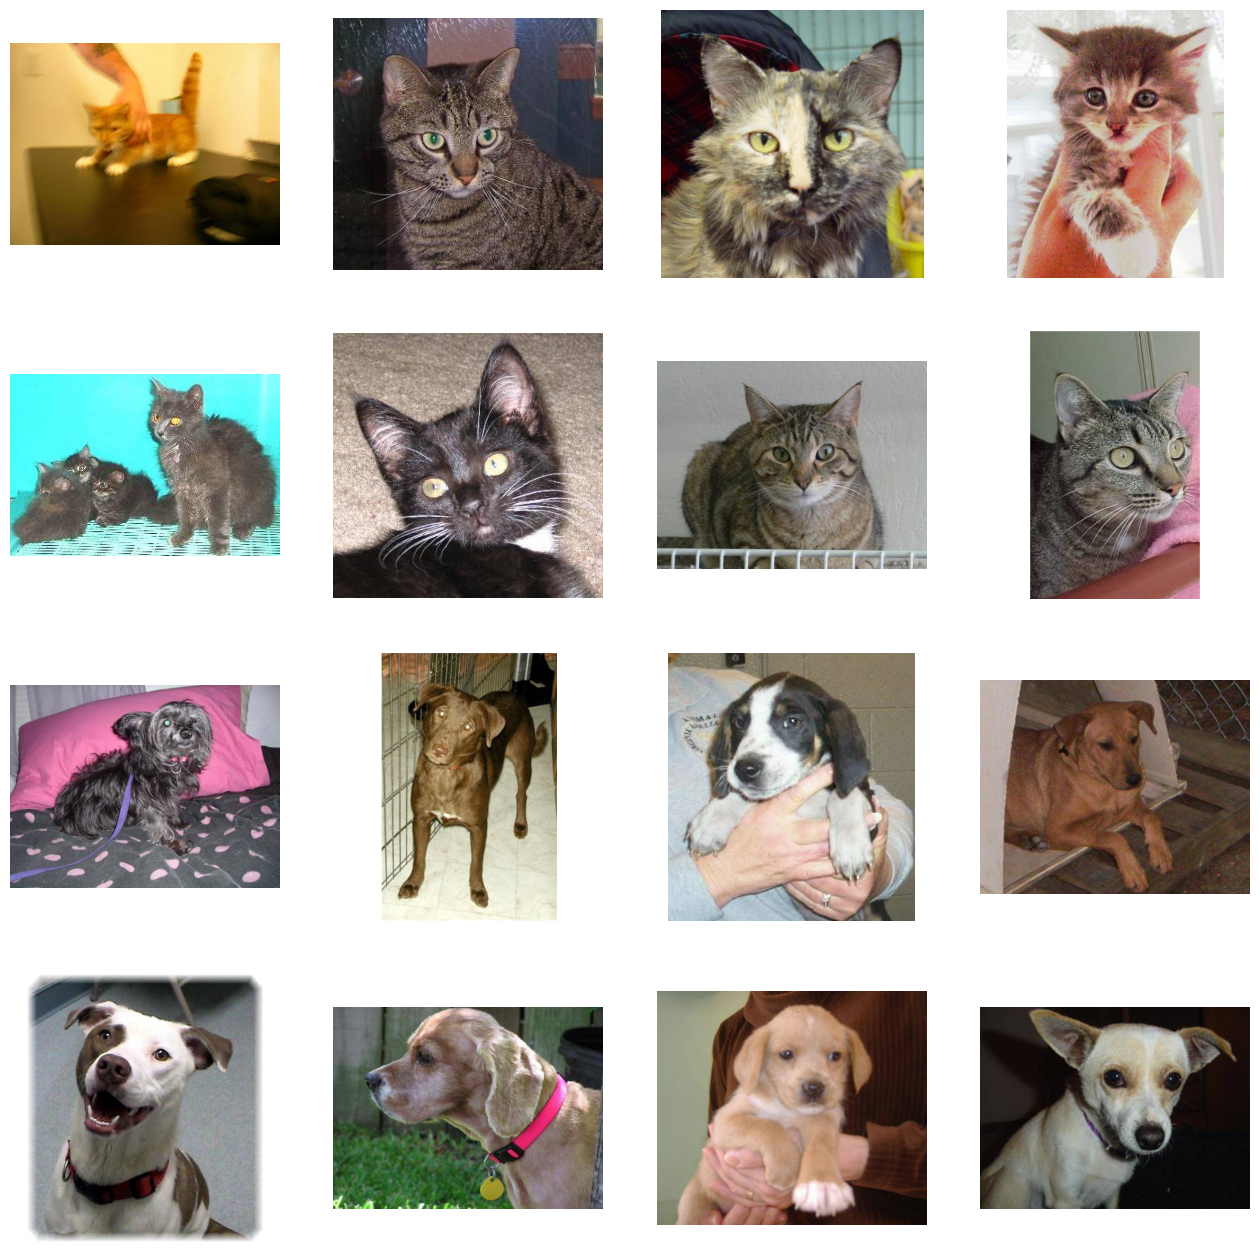

In [54]:
# print some images to check 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
pic_index = 0 # Index for iterating over images

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[ pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

In [55]:
# Khởi tạo mô hình CNN

# Chúng ta sẽ sử dụng một mô hình CNN từ thư viện TensorFlow, với kiến trúc như sau:
# 
# • 03 tầng tích chập (convolution layers) kết hợp với Pooling (MaxPooling layers), kích thước mặt nạ tích
# chập là 3x3, kích thước pooling là 2x2.
# • Sau mỗi tầng tích chập, hàm kích hoạt được sử dụng là ReLU.
# • Tiếp theo là một tầng Full Connection và tầng tiếp theo là Flatten (duỗi các kết quả đầu ra thành vector).
# • Cuối cùng là một tầng phân loại ở đầu ra, sử dụng hàm Sigmoid (logistic – vì đây chỉ có 02 lớp)
# 
# Khởi tạo một CNN như trên:

import tensorflow as tf
import keras


model = keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    keras.layers.Flatten(),
    
    # 512 neuron hidden layer
    keras.layers.Dense(512, activation='relu'),
    
    # Only 1 output neuron.
    # It will contain a value from 0-1 where 0 for 1 class ('cats')
    # and 1 for the other ('dogs')
    keras.layers.Dense(1, activation='sigmoid')
])

In [56]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     9,470,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# Huấn luyện mô hình
from keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics = ['accuracy'])

In [80]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen = ImageDataGenerator( rescale = 1.0/255. )
# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=25, class_mode='binary', target_size=(150, 150))

# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator = test_datagen.flow_from_directory(validation_dir, batch_size=25, class_mode = 'binary', target_size =(150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [81]:
# gọi lệnh huấn luyện mô hình
history = model.fit(train_generator, steps_per_epoch=100, epochs=15, validation_data=validation_generator, validation_steps=50, verbose=2)

Epoch 1/15
100/100 - 13s - 128ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.7450 - val_loss: 1.7550
Epoch 2/15
100/100 - 10s - 104ms/step - accuracy: 1.0000 - loss: 7.3601e-04 - val_accuracy: 0.7350 - val_loss: 1.8840
Epoch 3/15
100/100 - 11s - 106ms/step - accuracy: 0.9920 - loss: 0.0374 - val_accuracy: 0.7260 - val_loss: 1.8485
Epoch 4/15
100/100 - 10s - 103ms/step - accuracy: 0.9945 - loss: 0.0176 - val_accuracy: 0.7180 - val_loss: 2.0426
Epoch 5/15
100/100 - 11s - 107ms/step - accuracy: 0.9990 - loss: 0.0051 - val_accuracy: 0.7440 - val_loss: 1.6392
Epoch 6/15
100/100 - 12s - 117ms/step - accuracy: 0.9930 - loss: 0.0398 - val_accuracy: 0.7400 - val_loss: 1.5325
Epoch 7/15
100/100 - 10s - 104ms/step - accuracy: 1.0000 - loss: 6.5870e-04 - val_accuracy: 0.7390 - val_loss: 1.7151
Epoch 8/15
100/100 - 10s - 104ms/step - accuracy: 1.0000 - loss: 6.0412e-05 - val_accuracy: 0.7470 - val_loss: 2.1230
Epoch 9/15
100/100 - 10s - 103ms/step - accuracy: 1.0000 - loss: 1.6479e-05 

In [82]:
import numpy as np
import random

from keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = keras.models.Model(inputs = model.inputs, outputs = successive_outputs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


C:\Users\Admin\AppData\Local\Temp\ipykernel_1188\1527131244.py:48: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()
C:\Users\Admin\AppData\Local\Temp\ipykernel_1188\1527131244.py:51: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


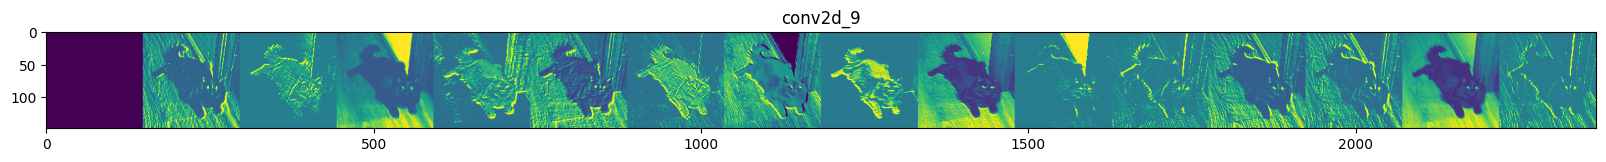

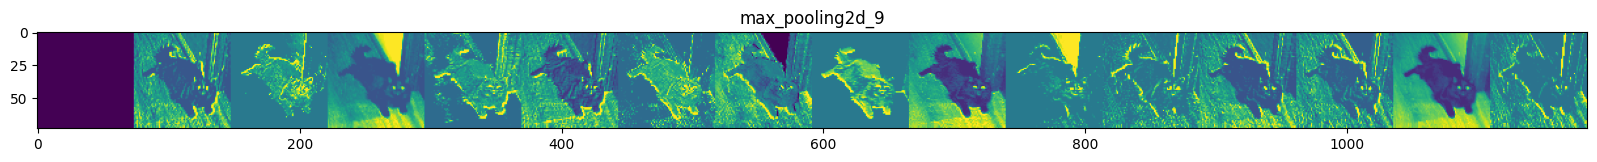

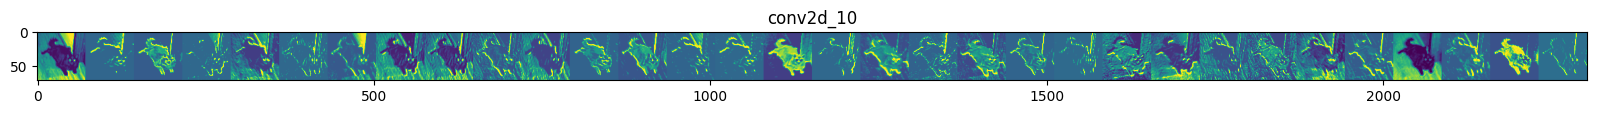

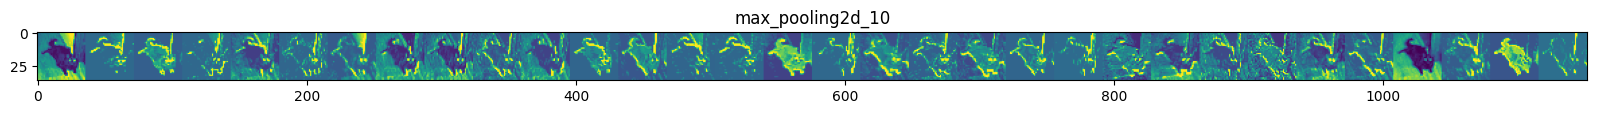

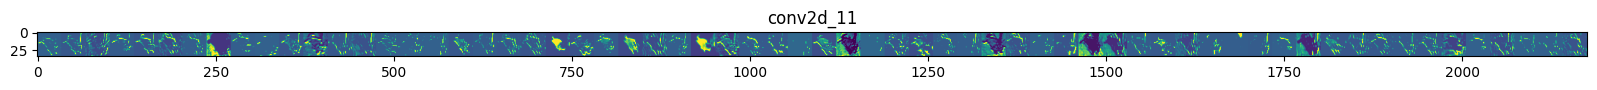

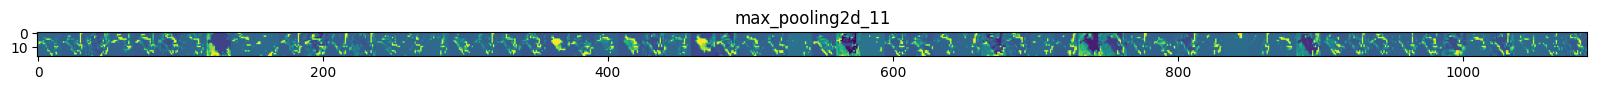

In [83]:
# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150)) # this is a PIL image

x = img_to_array(img) # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape) # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150)) # this is a PIL image

x = img_to_array(img) # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape) # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so we can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        #-------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        #-------------------------------------------
        n_features = feature_map.shape[-1] # number of features in the feature map
        size = feature_map.shape[ 1] # feature map shape (1, size, size, n_features)
        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))
        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid
            
            
        #-----------------
        # Display the grid
        #-----------------
        scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title ( layer_name )
        plt.grid ( False )
        plt.imshow( display_grid, aspect='auto', cmap='viridis' )

In [84]:
import numpy as np
#from google.colab import files
from keras.preprocessing import image
#uploaded=files.upload()
#for fn in uploaded.keys():
fn = 'landscape-1515004324-boston-terrier.jpg' # change it to your image file

# predicting images
path="E:\\ML\\CNN\\cats_and_dogs_filtered\\test\\landscape-1515004324-boston-terrier.jpg" # change it to your image

img=image.load_img(path, target_size=(150, 150))
x=image.img_to_array(img)
x /= 255
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print(fn + " is a dog" )
else:
    print(fn + " is a cat" )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[0.99982184]
landscape-1515004324-boston-terrier.jpg is a dog


Text(0.5, 1.0, 'Training and validation loss')

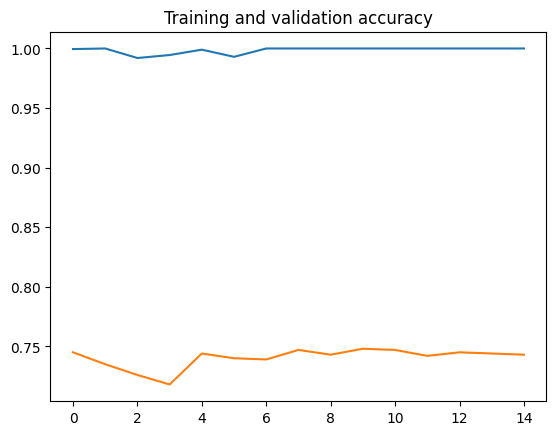

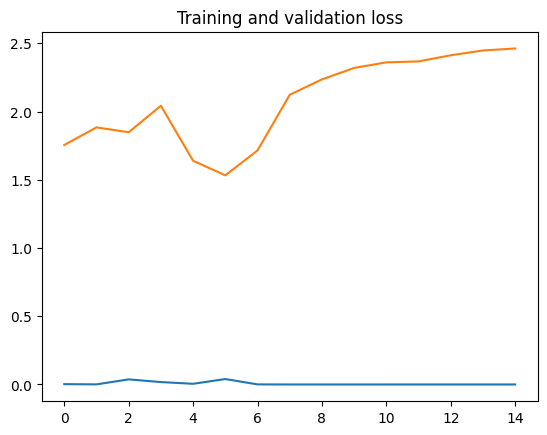

In [85]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

# Nhận xét: mô hình bị overfitting